In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st

In [4]:
races = [
  { 'name': 'White alone', 'p': 0.724 },
  { 'name': 'Black or African-American', 'p': 0.126 },
  { 'name': 'Asian', 'p': 0.048 },
  { 'name': 'Native American and Alaska Natives', 'p': 0.009 },
  { 'name': 'Native Hawaiians and Other Pacific Islanders', 'p': 0.002 },
  { 'name': 'Two or more races', 'p': 0.029 },
  { 'name': 'Some other race', 'p': 0.062 },
]

ethnicities = [
  { 'name': 'Hispanic and Latino American', 'p': 0.163 },
  { 'name': 'Not Hispanic or Latino American', 'p': 0.837 }
]

In [5]:
def draw_from(mutually_exclusive, seed=78):
  r = np.random.rand()
  sorted_groups = sorted(mutually_exclusive, key=lambda group: -1 * group['p'])
  for group in sorted_groups:
    if r <= group['p']: return group
  return sorted_groups[-1]

In [6]:
people = []
for i in range(0, 100): people.append(draw_from(races))
print(len(people))



100


In [7]:
def generate_trials(seed=42):
  np.random.seed(seed)

  raw_trials = []
  for i in range(0, 50): raw_trials.append({ 'scenario_id': i, 'race': 'White alone'})
  for i in range(0, 50): raw_trials.append({ 'scenario_id': i, 'race': 'Black or African-American'})
  np.random.shuffle(raw_trials)
  return raw_trials

print(generate_trials()[0])

{'race': 'Black or African-American', 'scenario_id': 33}


In [8]:
def generate_responses(trials, possible_responses, seed=37):
  np.random.seed(seed)
  responses = []

  for trial in trials:
    choice = np.random.choice(possible_responses)
    responses.append({ 'trial': trial, 'choice': choice})

  return responses

In [9]:
def generate_session(seed=107):
  trials = generate_trials(seed)
  responses = generate_responses(trials, [True, False], seed)
  return {'responses': responses, 'trials': trials}


In [10]:
def generate_sessions(n_subjects, seed=7):
  sessions = []
  for s in range(seed, seed + n_subjects):
    sessions.append(generate_session(s))
  return sessions

def plot_experiment(experiment):
  plt.figure(figsize=(20,5))
  n, bins, patches = plt.hist(percents, 20)
  plt.xlim(0, 1)
  plt.show()
    
  plt.figure(figsize=(20,1.2))
  plt.xlim(0, 1)
  plt.boxplot(percents, 0, 'rs', 0)
  plt.show()

In [11]:
ss = generate_sessions(10)
plot_experiment(ss)

NameError: name 'percents' is not defined

In [12]:
# given a session, is there any difference in same scenario by race?
# given an experiment, across all subjects is there any difference in same scenario by race?
# by scenario, any differences by race across all subjects?

def analysis(sessions):
  responses_by_scenarios = {}
  rate_by_scenarios = {}
  for session in sessions:
    for response in session['responses']:
      scenario_id = response['trial']['scenario_id']
      if not scenario_id in responses_by_scenarios:
        responses_by_scenarios[scenario_id] = []
      responses_by_scenarios[scenario_id].append(response)

  for scenario_id, responses in responses_by_scenarios.items():
    trues = sum(1 if response['choice'] else 0 for response in responses)
    rate_by_scenarios[scenario_id] = trues

  return responses_by_scenarios, rate_by_scenarios
#     choices = list(r['choice'] for r in session['responses'])
#     percent = choices.count(True) / len(choices)
#     percents.append(percent)
#   return percents


In [13]:
def plot_rates(rates):
  plt.figure(figsize=(20,5))
  n, bins, patches = plt.hist(list(rates.values()), 20)
  plt.xlim(0, len(rates.values()))
  plt.show()
    
ss = generate_sessions(10)
plot_experiment(ss)
responses, rates = analysis(ss)
print('By scenarios:')
print(responses[0])


print('Rates for all:')
plot_rates(rates)

NameError: name 'percents' is not defined

In [14]:
# with one scenario and n subjects, any differences by race across all subjects?
def simulate_one_scenario(n_subjects, conditions, possible_responses, ps, seed):
  np.random.seed(seed)
  trials = []

  for n in range(0, n_subjects - (n_subjects % len(conditions))):
    condition_index = n % len(conditions)
    condition = conditions[condition_index]
    p = None if ps == None else ps[condition_index]
    choice = np.random.choice(possible_responses, p=p)
    trials.append([condition, choice])

  np.random.shuffle(trials)
  return trials

conditions = ['Black', 'White', 'Unspecified']

In [15]:
def summarize_trials(n_subjects, ps, seed):
    np.random.seed(seed)
    results = []

    simulated_trials = simulate_one_scenario(n_subjects, conditions, [True, False], ps, seed)
    for condition in conditions:
        condition_trials = list(trial for trial in simulated_trials if trial[0] == condition)
        count = sum(1 if trial[1] else 0 for trial in condition_trials)
        p = round(count / len(condition_trials), 2)
        results.append((condition, count, len(condition_trials), p))
    return results

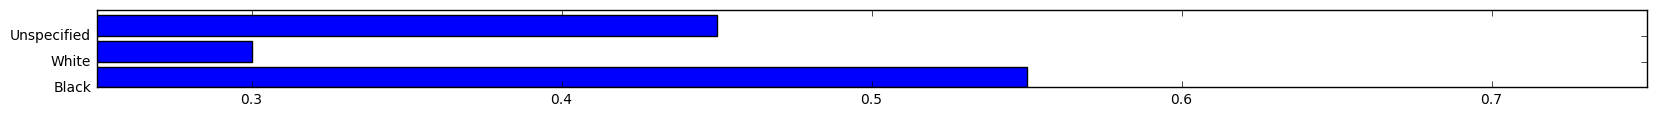

[('Black', 18, 33, 0.55), ('White', 10, 33, 0.3), ('Unspecified', 15, 33, 0.45)]


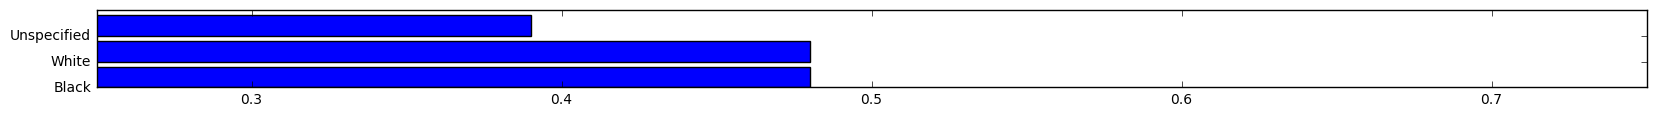

[('Black', 16, 33, 0.48), ('White', 16, 33, 0.48), ('Unspecified', 13, 33, 0.39)]


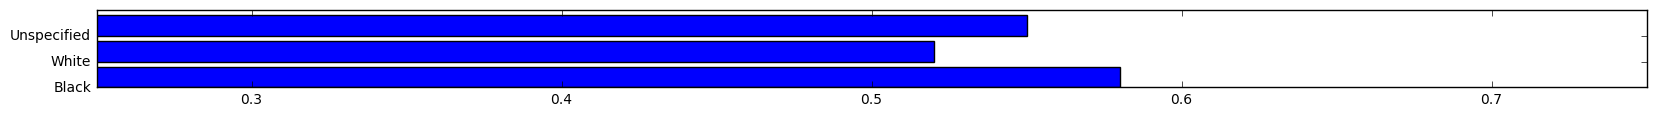

[('Black', 19, 33, 0.58), ('White', 17, 33, 0.52), ('Unspecified', 18, 33, 0.55)]


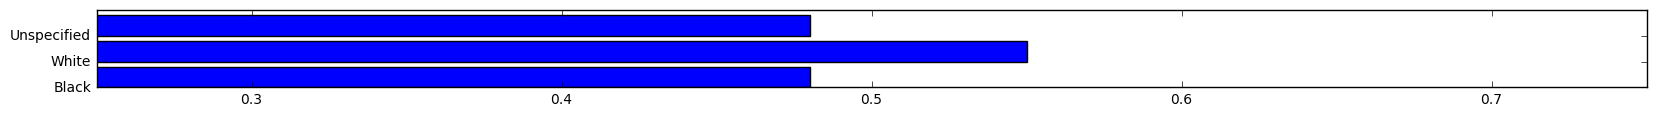

[('Black', 16, 33, 0.48), ('White', 18, 33, 0.55), ('Unspecified', 16, 33, 0.48)]


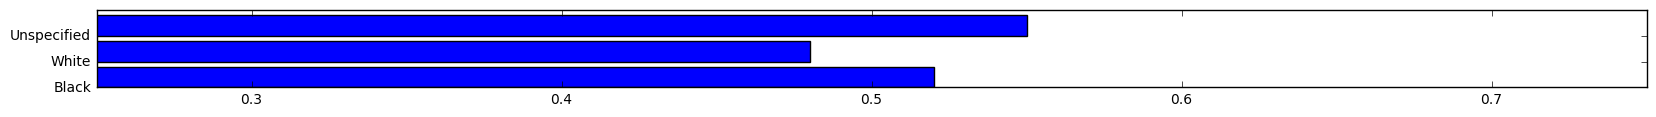

[('Black', 17, 33, 0.52), ('White', 16, 33, 0.48), ('Unspecified', 18, 33, 0.55)]


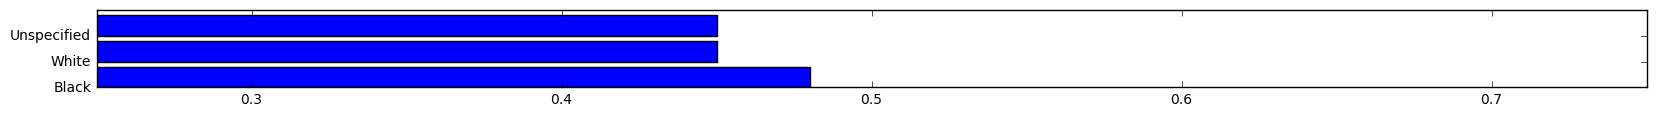

[('Black', 16, 33, 0.48), ('White', 15, 33, 0.45), ('Unspecified', 15, 33, 0.45)]


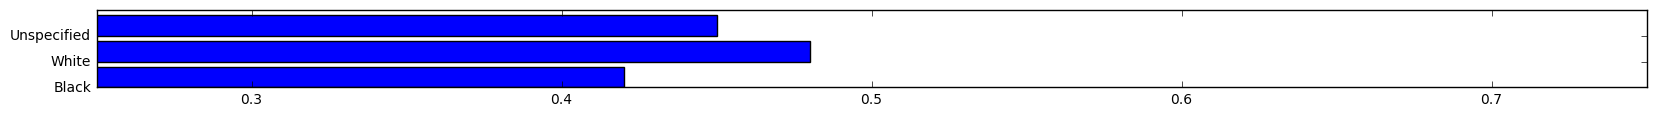

[('Black', 14, 33, 0.42), ('White', 16, 33, 0.48), ('Unspecified', 15, 33, 0.45)]


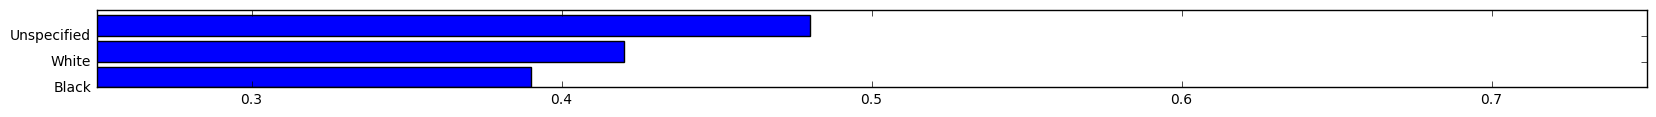

[('Black', 13, 33, 0.39), ('White', 14, 33, 0.42), ('Unspecified', 16, 33, 0.48)]


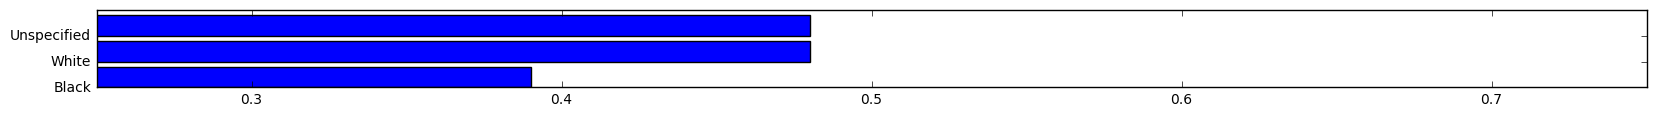

[('Black', 13, 33, 0.39), ('White', 16, 33, 0.48), ('Unspecified', 16, 33, 0.48)]


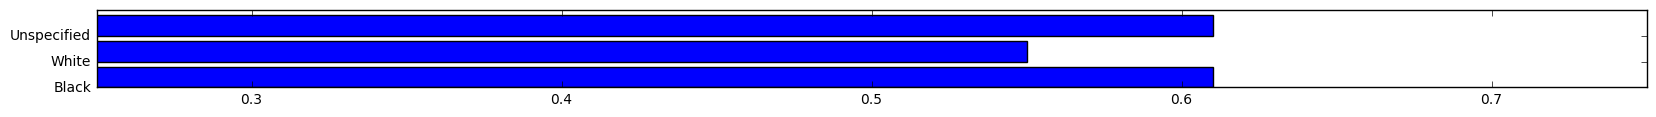

[('Black', 20, 33, 0.61), ('White', 18, 33, 0.55), ('Unspecified', 20, 33, 0.61)]


In [16]:
for s in range(0, 10):
    results = summarize_trials(100, None, s)
    plt.figure(figsize=(20,1.0))
#     n, bins, patches = plt.plot(list(rates.values()), 20)
    xs = list(map(lambda r: r[3], results))
    ys = np.arange(len(results))
    labels = list(map(lambda r: r[0], results))
    plt.barh(ys, xs)
    plt.yticks(ys, labels)
    plt.xlim(0.25, 0.75)
    plt.show()
    print(results)



PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 0
[0.3, 0.2, 0.5, 0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.2]
[0.5, 0.7, 0.7, 0.8, 0.5, 0.8, 0.7, 0.5, 0.8, 0.7]


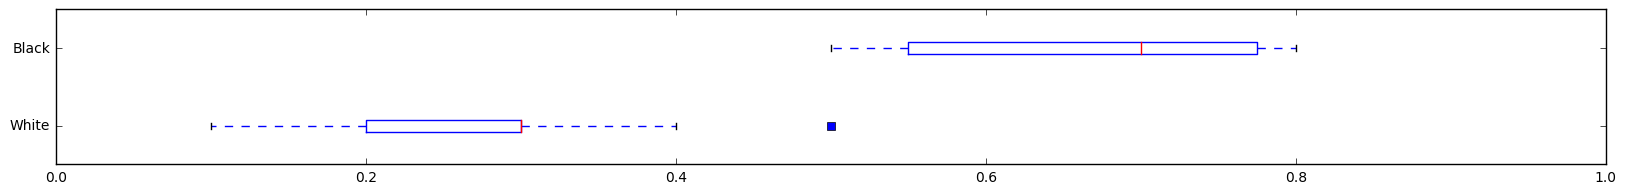

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 1
[0.2, 0.5, 0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5]
[0.7, 0.7, 0.8, 0.5, 0.8, 0.7, 0.5, 0.8, 0.7, 0.6]


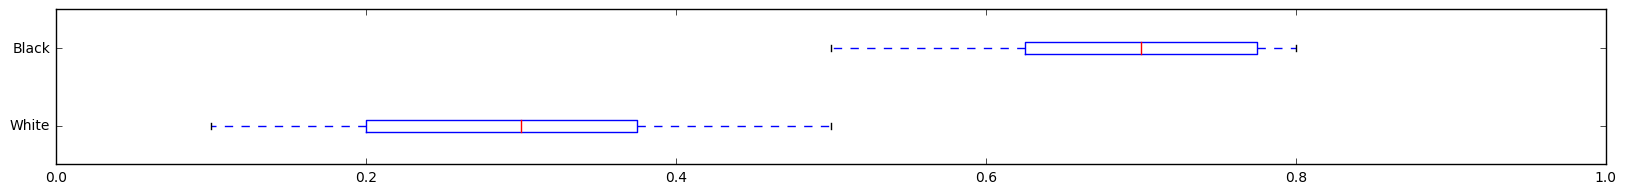

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 2
[0.5, 0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.6]
[0.7, 0.8, 0.5, 0.8, 0.7, 0.5, 0.8, 0.7, 0.6, 0.4]


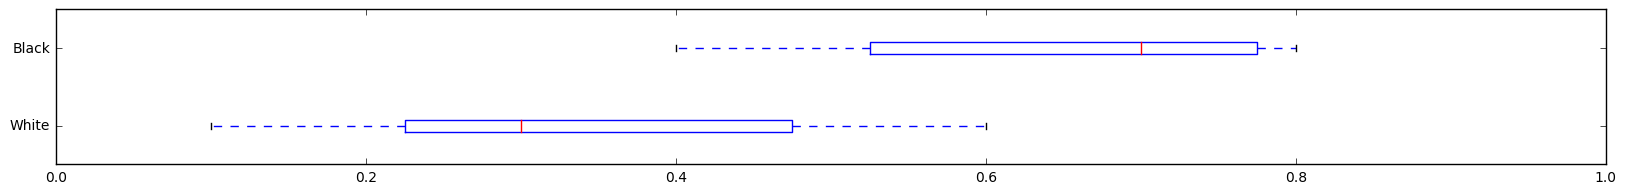

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 3
[0.4, 0.2, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.6, 0.2]
[0.8, 0.5, 0.8, 0.7, 0.5, 0.8, 0.7, 0.6, 0.4, 0.6]


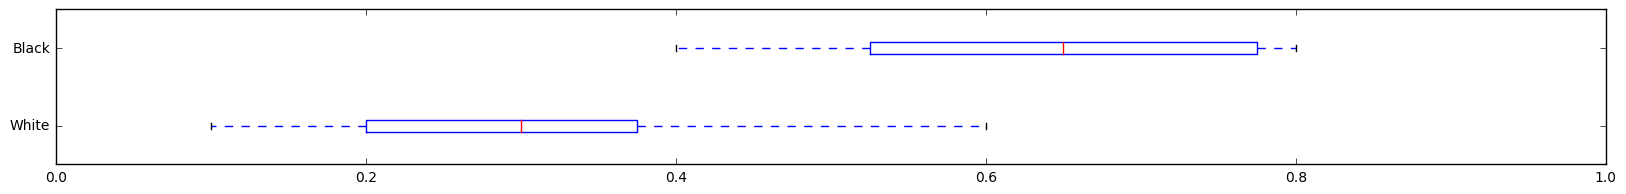

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 4
[0.2, 0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.6]
[0.5, 0.8, 0.7, 0.5, 0.8, 0.7, 0.6, 0.4, 0.6, 0.3]


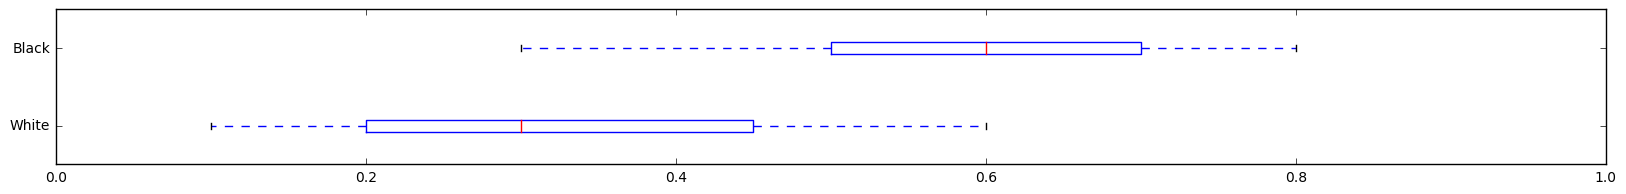

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 5
[0.1, 0.3, 0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.6, 0.5]
[0.8, 0.7, 0.5, 0.8, 0.7, 0.6, 0.4, 0.6, 0.3, 0.4]


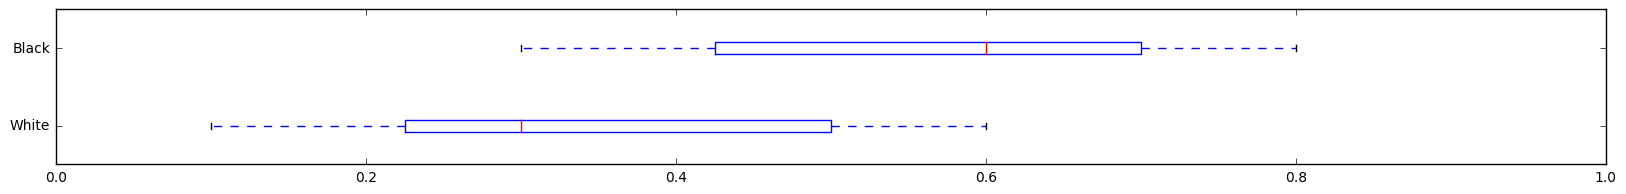

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 6
[0.3, 0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.6, 0.5, 0.7]
[0.7, 0.5, 0.8, 0.7, 0.6, 0.4, 0.6, 0.3, 0.4, 0.5]


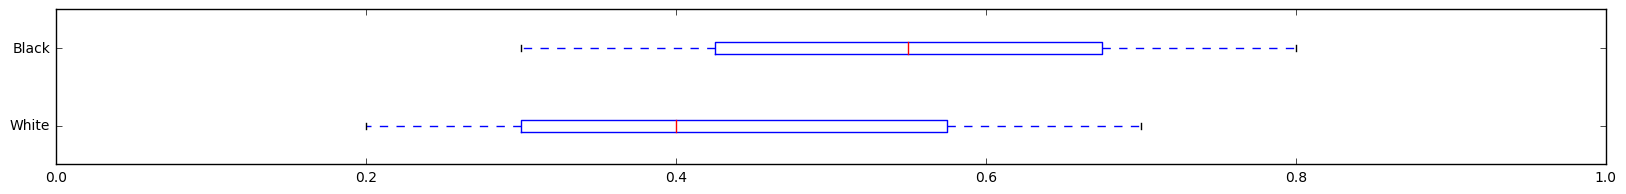

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 7
[0.3, 0.3, 0.2, 0.5, 0.6, 0.2, 0.6, 0.5, 0.7, 0.4]
[0.5, 0.8, 0.7, 0.6, 0.4, 0.6, 0.3, 0.4, 0.5, 0.9]


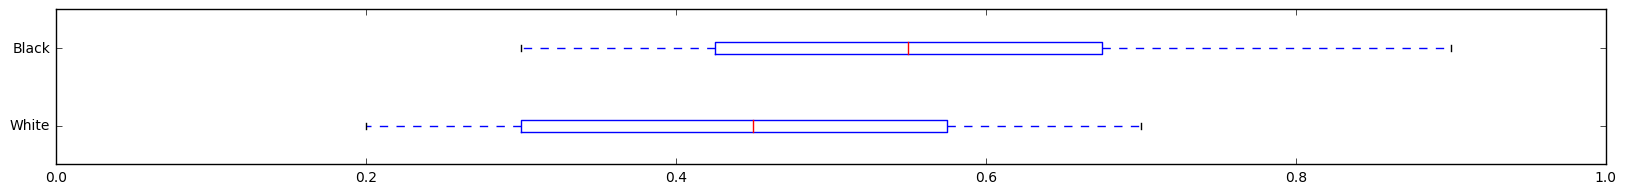

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 8
[0.3, 0.2, 0.5, 0.6, 0.2, 0.6, 0.5, 0.7, 0.4, 0.4]
[0.8, 0.7, 0.6, 0.4, 0.6, 0.3, 0.4, 0.5, 0.9, 0.5]


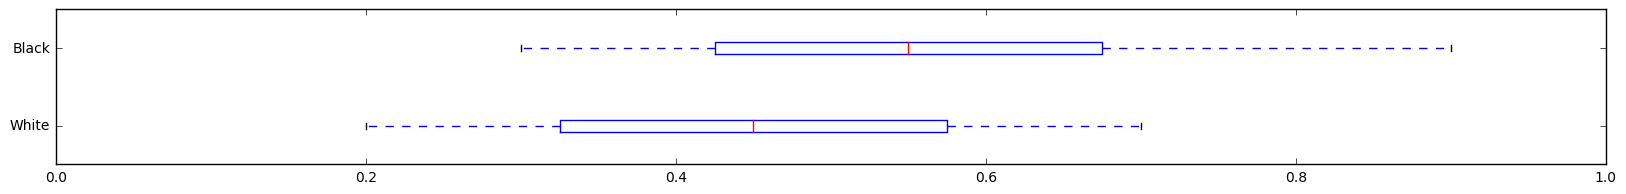

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 9
[0.2, 0.5, 0.6, 0.2, 0.6, 0.5, 0.7, 0.4, 0.4, 0.3]
[0.7, 0.6, 0.4, 0.6, 0.3, 0.4, 0.5, 0.9, 0.5, 0.4]


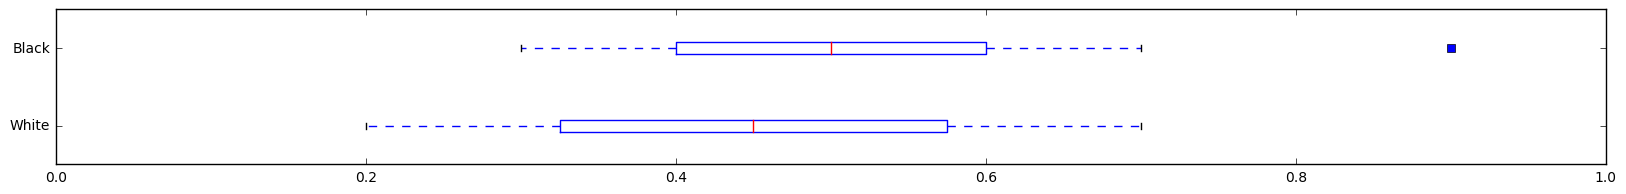

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 10
[0.5, 0.6, 0.2, 0.6, 0.5, 0.7, 0.4, 0.4, 0.3, 0.3]
[0.6, 0.4, 0.6, 0.3, 0.4, 0.5, 0.9, 0.5, 0.4, 0.8]


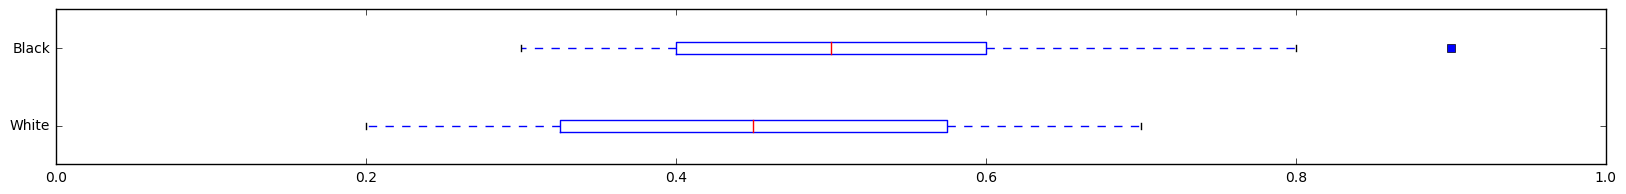

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 11
[0.6, 0.2, 0.6, 0.5, 0.7, 0.4, 0.4, 0.3, 0.3, 0.3]
[0.4, 0.6, 0.3, 0.4, 0.5, 0.9, 0.5, 0.4, 0.8, 0.6]


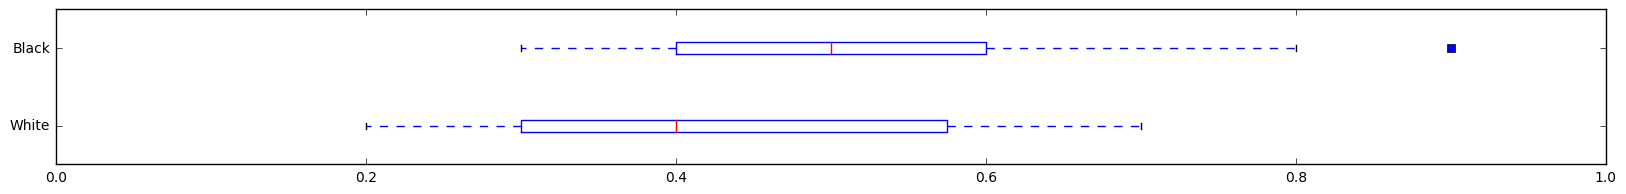

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 12
[0.2, 0.6, 0.5, 0.7, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3]
[0.6, 0.3, 0.4, 0.5, 0.9, 0.5, 0.4, 0.8, 0.6, 0.7]


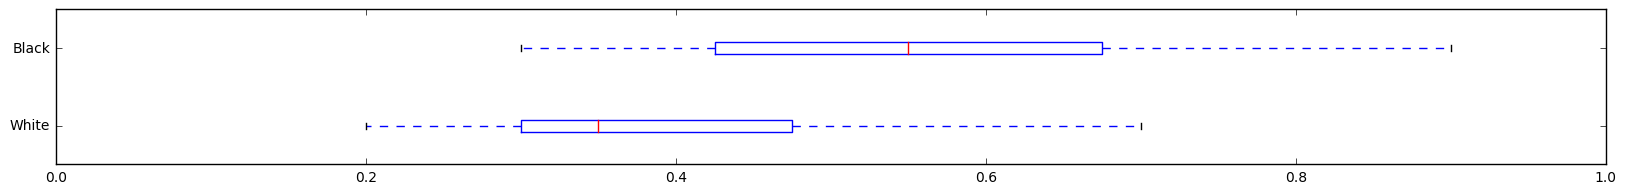

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 13
[0.6, 0.5, 0.7, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3]
[0.3, 0.4, 0.5, 0.9, 0.5, 0.4, 0.8, 0.6, 0.7, 0.8]


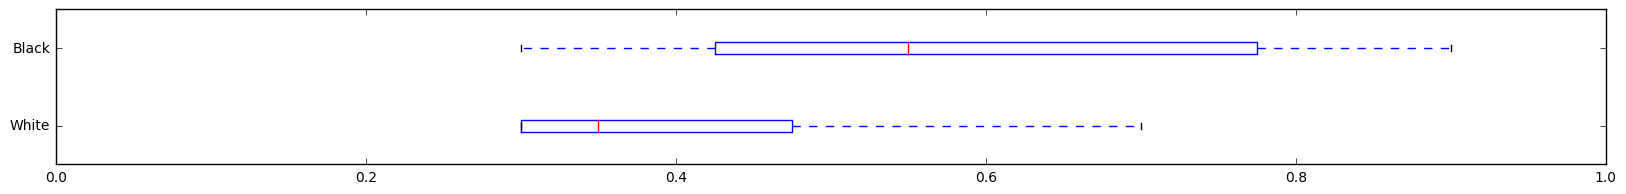

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 14
[0.5, 0.7, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2]
[0.4, 0.5, 0.9, 0.5, 0.4, 0.8, 0.6, 0.7, 0.8, 0.5]


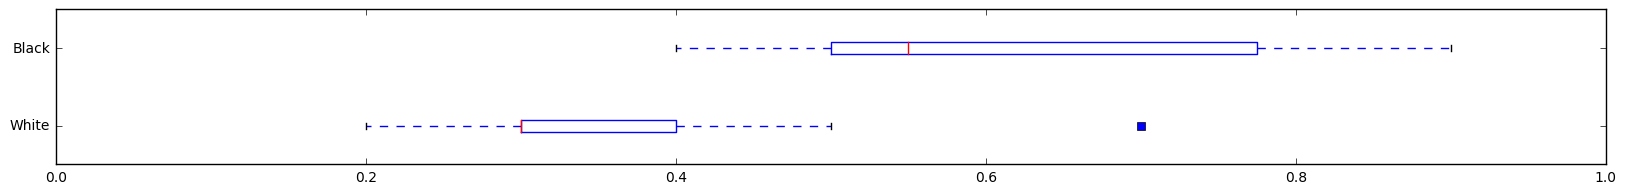

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 15
[0.7, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4]
[0.5, 0.9, 0.5, 0.4, 0.8, 0.6, 0.7, 0.8, 0.5, 0.6]


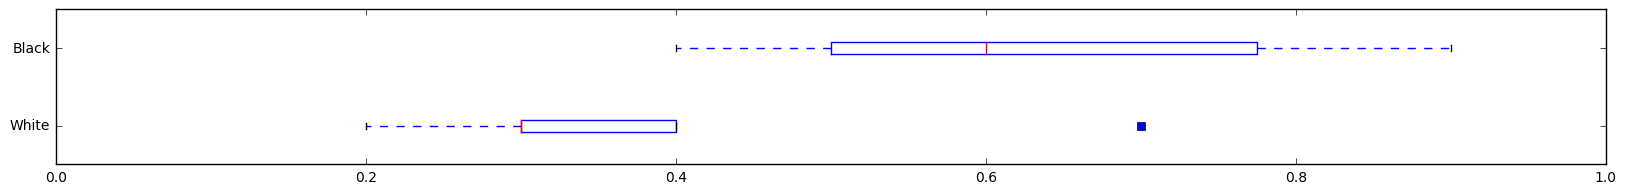

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 16
[0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4]
[0.9, 0.5, 0.4, 0.8, 0.6, 0.7, 0.8, 0.5, 0.6, 0.9]


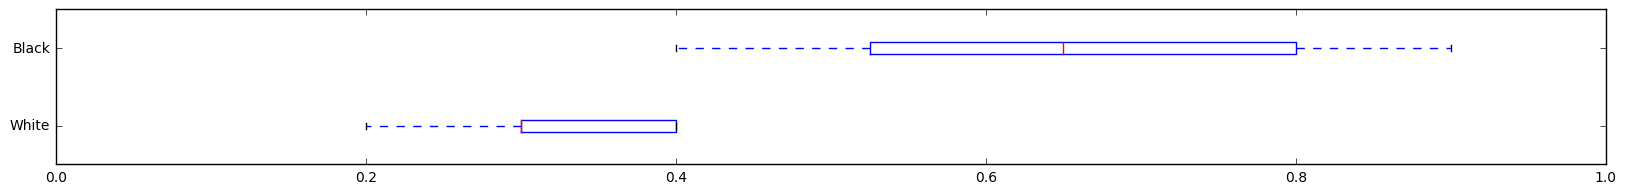

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 17
[0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2]
[0.5, 0.4, 0.8, 0.6, 0.7, 0.8, 0.5, 0.6, 0.9, 0.8]


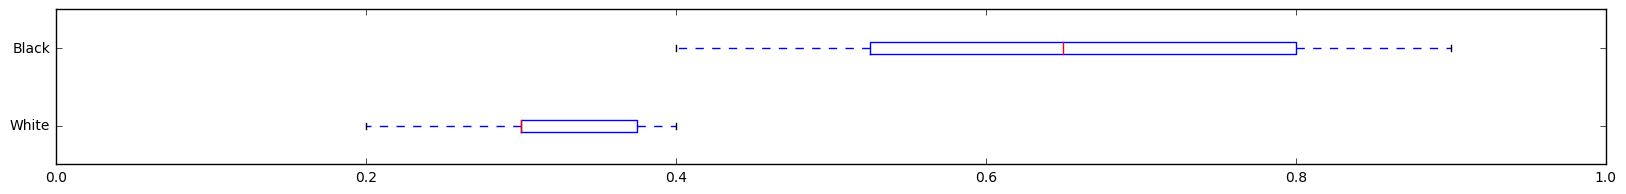

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 18
[0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.5]
[0.4, 0.8, 0.6, 0.7, 0.8, 0.5, 0.6, 0.9, 0.8, 0.6]


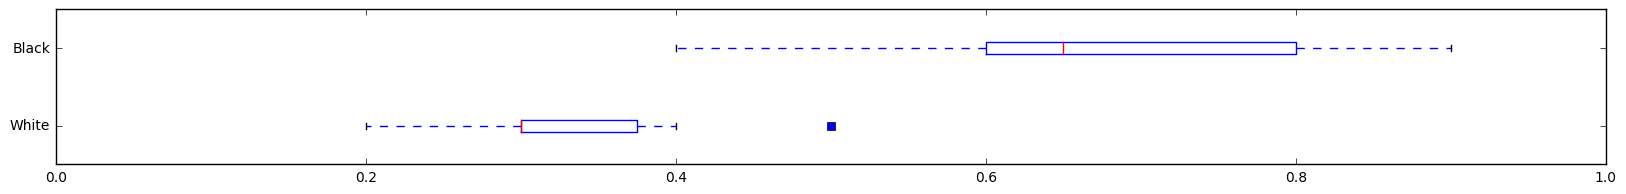

PARAMS  n_experiments: 10 | n_subjects: 30 | seed: 19
[0.3, 0.3, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.5, 0.4]
[0.8, 0.6, 0.7, 0.8, 0.5, 0.6, 0.9, 0.8, 0.6, 0.5]


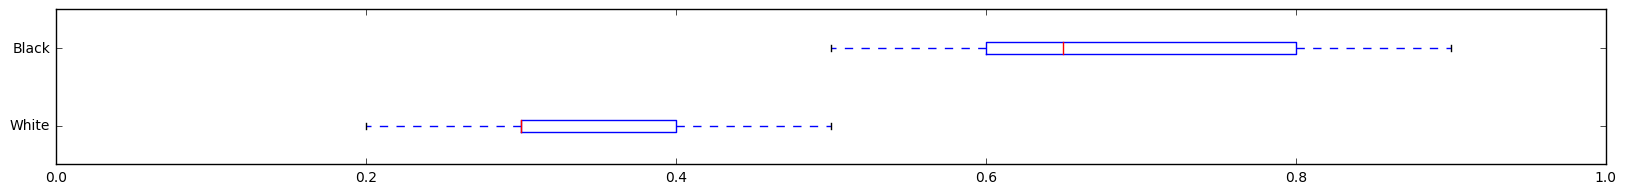

In [17]:
# def plotit(results):
#     xs = list(map(lambda r: r[3], results))
#     ys = np.arange(len(results))
#     labels = list(map(lambda r: r[0], results))
#     plt.barh(ys, xs)
#     plt.yticks(ys, labels)
#     plt.xlim(0.25, 0.75)

def boxit(counts):
    white_counts, black_counts = counts
    fig = plt.figure(figsize=(20,2.0))
    bp = plt.boxplot([white_counts, black_counts], 0, 'rs', 0)
    ax = fig.add_subplot(111)
    ax.set_yticklabels(['White', 'Black'])
    plt.xlim(0, 1)
    return plt
    
def many_experiments(n_experiments, n_subjects, ps, seed):
    white_results = []
    black_results = []
    for s in range(0, n_experiments):
        results = summarize_trials(n_subjects, ps, seed + s)
        black_count = list(result[3] for result in results if result[0] == 'Black')[0]
        white_count = list(result[3] for result in results if result[0] == 'White')[0]
        white_results.append(white_count)
        black_results.append(black_count)

    print('PARAMS  n_experiments: ' + str(n_experiments) + ' | n_subjects: ' + str(n_subjects) + ' | seed: ' + str(seed));
    print(white_results)
    print(black_results)
    return (white_results, black_results)

for s in range(0, 20):
  counts = many_experiments(10, 30, [[0.6, 0.4], [0.4, 0.6], None], s)
  boxit(counts).show()

PARAMS  n_experiments: 1 | n_subjects: 100 | seed: 0
[0.03]
[0.09]
Ratio: 0.3333333333333333


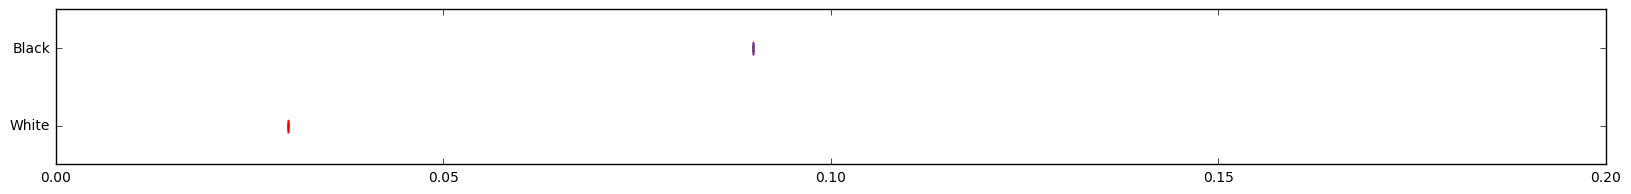

PARAMS  n_experiments: 1 | n_subjects: 100 | seed: 1
[0.12]
[0.06]
Ratio: 2.0


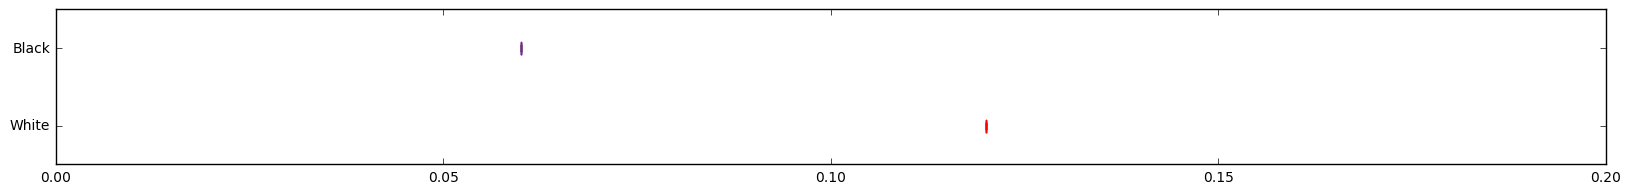

PARAMS  n_experiments: 1 | n_subjects: 100 | seed: 2
[0.12]
[0.03]
Ratio: 4.0


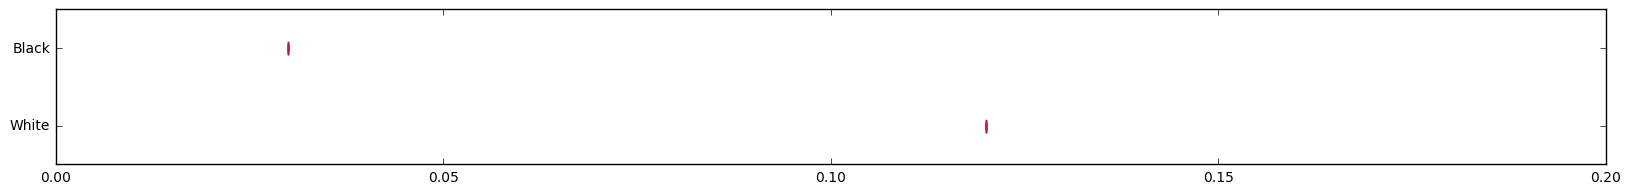

In [18]:
def ppair(p):
  return [p, 1 - p]

# see http://profiles.doe.mass.edu/ssdr/default.aspx?orgcode=02740505&orgtypecode=6&=02740505&
def run_ratios():
    for s in range(0, 3):
        counts = many_experiments(1, 100, [ppair(0.087), ppair(0.091), None], s)
        print("Ratio: " + str(sum(counts[0]) / sum(counts[1])))
        plt = boxit(counts)
        plt.xlim(0, 0.2)
        plt.show()
        
run_ratios()

In [19]:
def ppair(p):
  return [p, 1 - p]


def results_rate(results):
    total_count = len(results)
    black_count = list(result[3] for result in results if result[0] == 'Black')[0]
    white_count = list(result[3] for result in results if result[0] == 'White')[0]
    return (white_count / total_count, black_count / total_count)
        
def many_ratios(n_experiments, n_subjects, ps, seed):
    return proportions_to_ratios(many_proportions(n_experiments, n_subjects, ps, seed))

def proportions_to_ratios(proportions):
    ratios = []
    for proportion in proportions:
        white_rate, black_rate = proportion
        if black_rate != 0 and white_rate != 0:
            ratio = round(white_rate / black_rate, 3)
            ratios.append(ratio)
    return ratios

def many_proportions(n_experiments, n_subjects, ps, seed):
    proportions = []
    for s in range(0, n_experiments):
        results = summarize_trials(n_subjects, ps, seed + s)
        white_rate, black_rate = results_rate(results)
        proportions.append((white_rate, black_rate))
    return proportions

def plot_ratios(ratios):
    fig = plt.figure(figsize=(20,2.0))
    bp = plt.boxplot([ratios], 0, 'rs', 0)
    plt.xlim(0, 1)
    return plt

def plot_histo(values):
  plt.figure(figsize=(20,2))
  n, bins, patches = plt.hist(values, bins=20)
  plt.xlim(0, len(values))
  return plt

# see http://profiles.doe.mass.edu/ssdr/default.aspx?orgcode=02740505&orgtypecode=6&=02740505&
# this isn't a direct comparison - this is year-long rates, and we're looking at instantaneous
# rates for given incidents, we don't know rates for this a priori from the field
def somerville_aggregate_decision_model():
    return [ppair(0.087), ppair(0.091), ppair(0.081)]

# see http://www.uh.edu/~adkugler/Bertrand&Mullainathan.pdf
# assume scenarios are 50/50, and bias them to be at a 1.5 ratio favoring white students
def bertrand_decision_model():
    return [ppair(0.40), ppair(0.60), ppair(0.50)]

def null_decision_model():
    return [ppair(0.50), ppair(0.50), ppair(0.50)]

def summarize_ratios(n_subjects, n_experiments, ratios):
    plt = plot_ratios(ratios)
    plt.xlim(0, 2)
    plt.show()
    print('Subjects per experiment: ' + str(n_subjects))
    print('Experiments simulated: ' + str(n_experiments))
    print('Ratio percentiles: ' + str(np.percentile(ratios, [1, 5, 25, 50, 75, 95, 99])))
    print('Dropped experiments (zeros): ' + str(n_experiments - len(ratios)) + ' / ' + str(n_experiments))


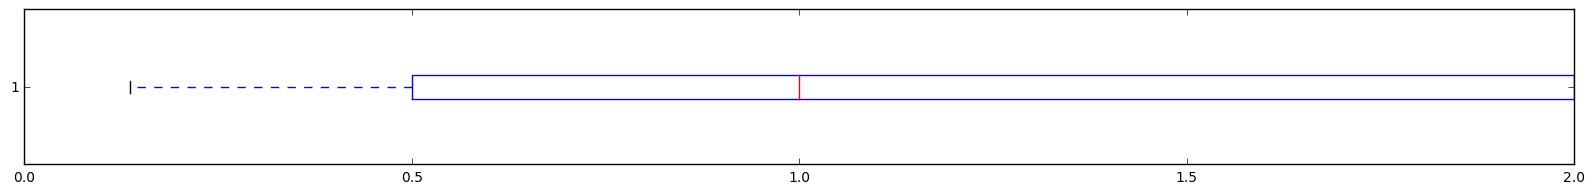

Subjects per experiment: 50
Experiments simulated: 10000
Ratio percentiles: [ 0.24   0.316  0.5    1.     2.     3.167  4.167]
Dropped experiments (zeros): 4014 / 10000


In [22]:
n_subjects = 50
n_experiments = 10000
ratios = many_ratios(n_experiments, n_subjects, somerville_aggregate_decision_model(), 45)
summarize_ratios(n_subjects, n_experiments, ratios)

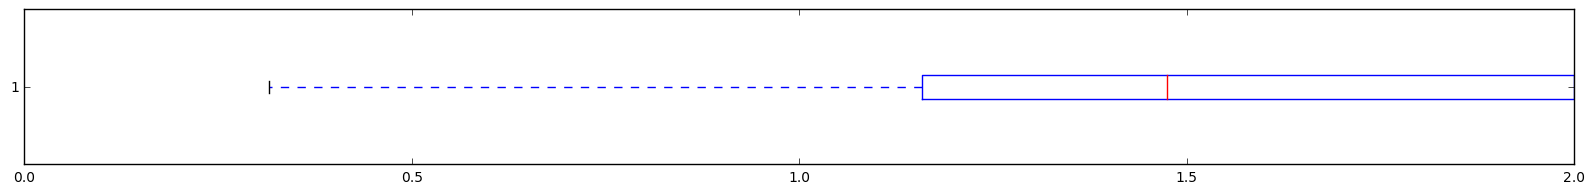

Subjects per experiment: 50
Experiments simulated: 10000
Ratio percentiles: [ 0.6371  0.864   1.158   1.474   2.      3.      5.167 ]
Dropped experiments (zeros): 4 / 10000


In [21]:
n_subjects = 50
n_experiments = 10000
ratios = many_ratios(n_experiments, n_subjects, bertrand_decision_model(), 45)
summarize_ratios(n_subjects, n_experiments, ratios)

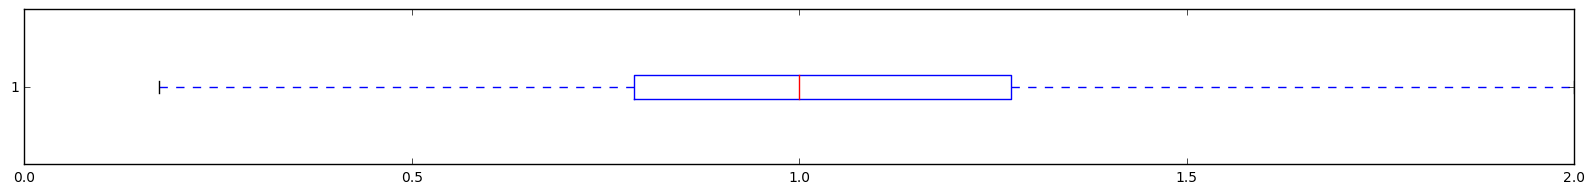

Subjects per experiment: 50
Experiments simulated: 10000
Ratio percentiles: [ 0.383  0.551  0.786  1.     1.273  1.816  2.48 ]
Dropped experiments (zeros): 1 / 10000


In [23]:
n_subjects = 50
n_experiments = 10000
ratios = many_ratios(n_experiments, n_subjects, null_decision_model(), 45)
summarize_ratios(n_subjects, n_experiments, ratios)

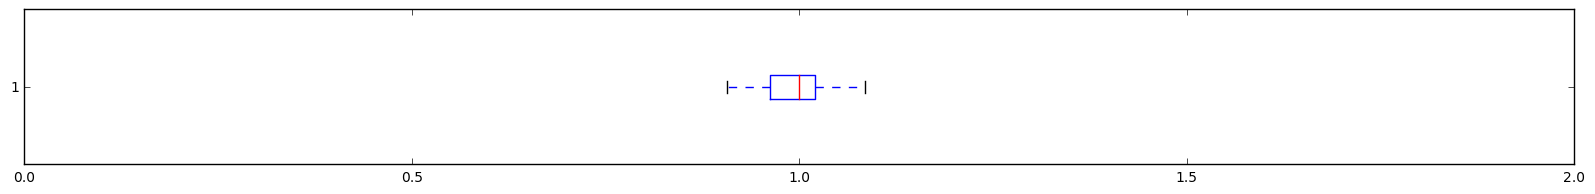

Subjects per experiment: 5000
Experiments simulated: 100
Ratio percentiles: [ 0.92283  0.9591   0.962    1.       1.02     1.062    1.08302]
Dropped experiments (zeros): 0 / 100


In [24]:
n_subjects = 5000
n_experiments = 100
ratios = many_ratios(n_experiments, n_subjects, null_decision_model(), 45)
summarize_ratios(n_subjects, n_experiments, ratios)

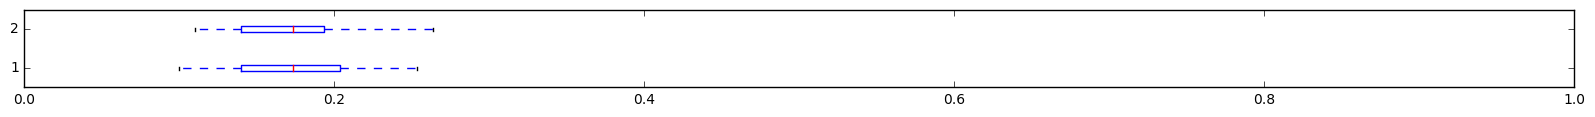

Percentiles, white: [ 0.14        0.17333333  0.19333333]
Percentiles, black: [ 0.14        0.17333333  0.20333333]
Subjects per experiment: 100
Experiments simulated: 100
Dropped experiments (zeros): 0 / 100


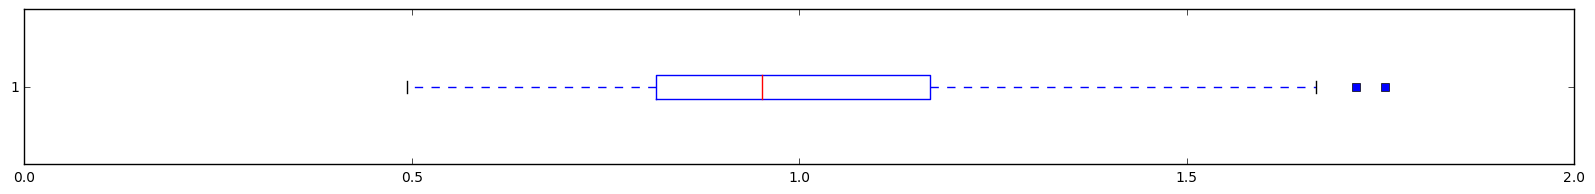

Subjects per experiment: 100
Experiments simulated: 100
Ratio percentiles: [ 0.5128   0.6845   0.8155   0.952    1.1685   1.59525  1.71838]
Dropped experiments (zeros): 0 / 100


In [25]:
def plot_rates(rates):
    fig = plt.figure(figsize=(20,1.0))
    bp = plt.boxplot(rates, 0, 'rs', 0)
    plt.xlim(0, 1)
    return plt


def summarize_proportions(n_subjects, n_experiments, proportions):
    white_rates = list(map(lambda p: p[0], proportions))
    black_rates = list(map(lambda p: p[1], proportions))
    plt = plot_rates([black_rates, white_rates])
    plt.show()
    print('Percentiles, white: ' + str(np.percentile(white_rates, [25, 50, 75])))
    print('Percentiles, black: ' + str(np.percentile(black_rates, [25, 50, 75])))
    print('Subjects per experiment: ' + str(n_subjects))
    print('Experiments simulated: ' + str(n_experiments))
    print('Dropped experiments (zeros): ' + str(n_experiments - len(proportions)) + ' / ' + str(n_experiments))
    ratios = proportions_to_ratios(proportions)
    summarize_ratios(n_subjects, n_experiments, ratios)

    
n_subjects = 100
n_experiments = 100
proportions = many_proportions(n_experiments, n_subjects, null_decision_model(), 45)
summarize_proportions(n_subjects, n_experiments, proportions)

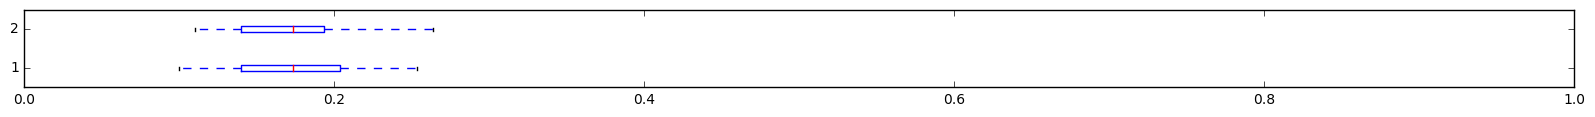

Percentiles, white: [ 0.14        0.17333333  0.19333333]
Percentiles, black: [ 0.14        0.17333333  0.20333333]
Subjects per experiment: 100
Experiments simulated: 100
Dropped experiments (zeros): 0 / 100


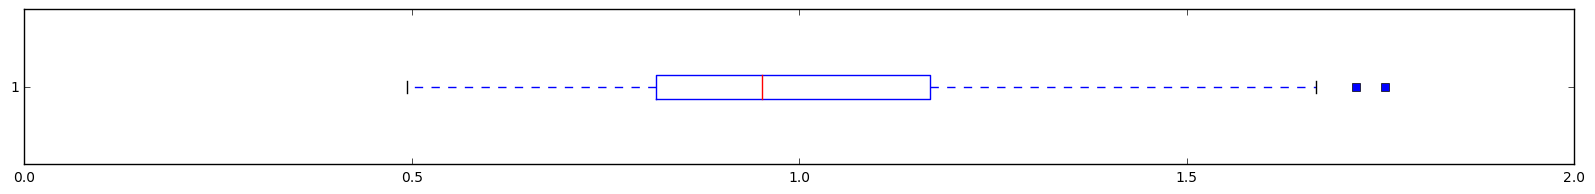

Subjects per experiment: 100
Experiments simulated: 100
Ratio percentiles: [ 0.5128   0.6845   0.8155   0.952    1.1685   1.59525  1.71838]
Dropped experiments (zeros): 0 / 100


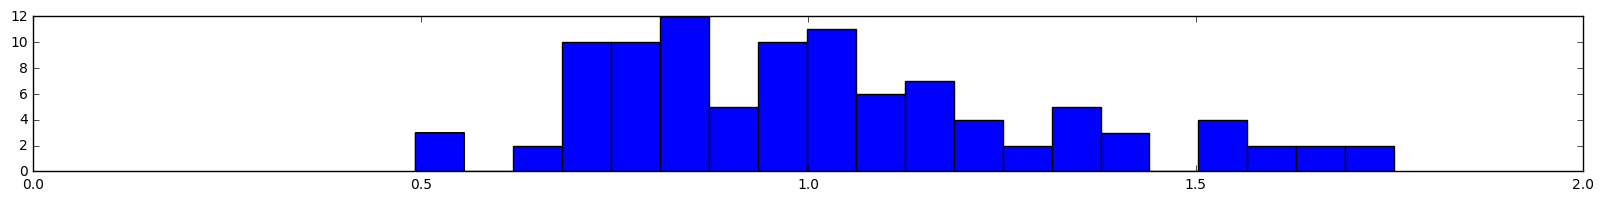

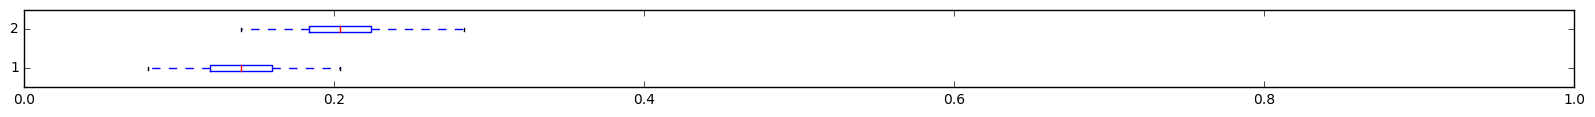

Percentiles, white: [ 0.18333333  0.20333333  0.22333333]
Percentiles, black: [ 0.12  0.14  0.16]
Subjects per experiment: 100
Experiments simulated: 100
Dropped experiments (zeros): 0 / 100


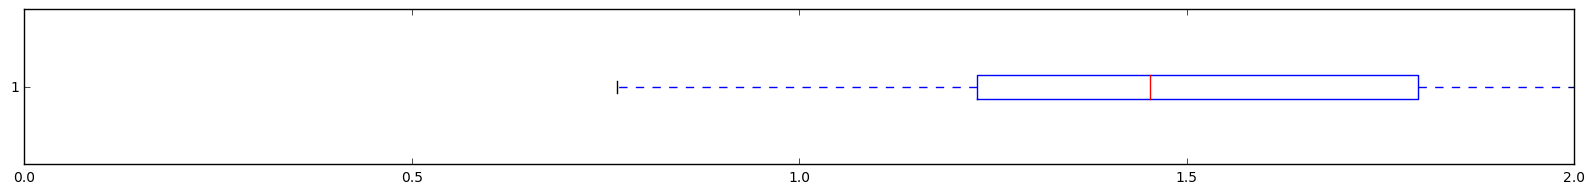

Subjects per experiment: 100
Experiments simulated: 100
Ratio percentiles: [ 0.90062  1.       1.22875  1.452    1.79875  2.33485  2.48608]
Dropped experiments (zeros): 0 / 100
Done.


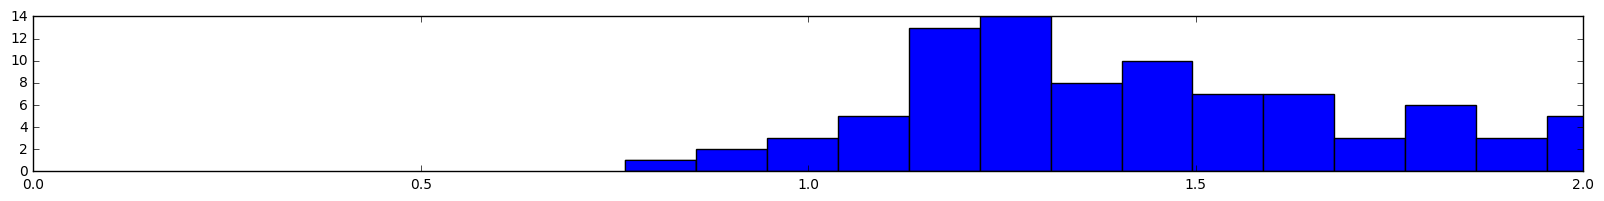

In [26]:
n_subjects = 100
n_experiments = 100


for dm in [null_decision_model(), bertrand_decision_model()]:
    proportions = many_proportions(n_experiments, n_subjects, dm, 45)
    summarize_proportions(n_subjects, n_experiments, proportions)
    plot_histo(proportions_to_ratios(proportions)).xlim(0, 2)

print('Done.')

In [27]:
def calculate_z(sample_proportion, hypothesized_population_proportion, sample_size):
    return (sample_proportion - hypothesized_population_proportion) / math.sqrt(hypothesized_population_proportion * (1 - hypothesized_population_proportion) / sample_size)

In [28]:
calculate_z(0.62, 0.5, 100)

2.4

In [29]:
st.norm.ppf(.95)

1.6448536269514722

In [30]:
# if the null hypothesis is true, what's the likelihood of seeing the values we saw?
# why does this have anything to do with samples from populations?  it doesn't seem like
# knowing more of the population would help.  "samples" has another sense though, of drawing
# a value from a probabilistic process, and here it's clear that more samples yields more
# information, but there's no related population parameter.

# effect size is the difference between true value and null hypothesis value
# how can the null hypothesis have a single value for any probabilistic process?


In [115]:
def simulate_biased(simulations, sample_size, biases, seed):
    sixty_simulations = []
    null_simulations = []
    for s in range(0, simulations):
        np.random.seed(seed + s)
        sixty_simulations.append(np.random.choice([1, 0], sample_size, p=biases[0]))
        null_simulations.append(np.random.choice([1, 0], sample_size, p=biases[1]))
    return [sixty_simulations, null_simulations]

def simulate_same(simulations, sample_size, seed):
    return simulate_biased(simulations, sample_size, [[0.5, 0.5], [0.5,0.5]], seed)

def simulate_same_and_report(n_simulations, sample_size, seed):
    pairs = simulate_same(n_simulations, sample_size, seed)
    return report_on_simulation(pairs, n_simulations, sample_size)

def simulate_biased_and_report(n_simulations, sample_size, biases, seed):
    """
    For a particular sample size, run n_simulations to see what the diff would be
    for the null hypothesis and for a 60/40 decision process, given a boolean decision.
    """
    pairs = simulate_biased(n_simulations, sample_size, biases, seed)
    report_on_simulation(pairs, n_simulations, sample_size)
    return pairs

def compute_diffs(pairs, sample_size):
    normalized_runs = np.sum(pairs, axis=2)/sample_size
    possible_pairs = []
    for x in normalized_runs[0]:
        for y in normalized_runs[1]:
            possible_pairs.append([x,y])

    return list(pair[1] - pair[0] for pair in possible_pairs)

def report_on_simulation(pairs, n_simulations, sample_size):
    normalized_runs = np.sum(pairs, axis=2)/sample_size
    for condition_values in normalized_runs:
        plot_histo(condition_values).xlim(0, 1)

    diffs = compute_diffs(pairs, sample_size)
    plot_histo(diffs).xlim(-1, 1)

    p95 = np.percentile(diffs, [5, 95])
    p99 = np.percentile(diffs, [1, 99])
    for x in p95: plt.axvline(x, color='#ff0000')
    for x in p99: plt.axvline(x, color='#ff9999')
    plt.show()

    print('p95 significance for diff values: diff < ' + str(p95[0]) + ' or diff > ' + str(p95[1]))
    print('p99 significance for diff values: diff < ' + str(p99[0]) + ' or diff > ' + str(p99[1]))

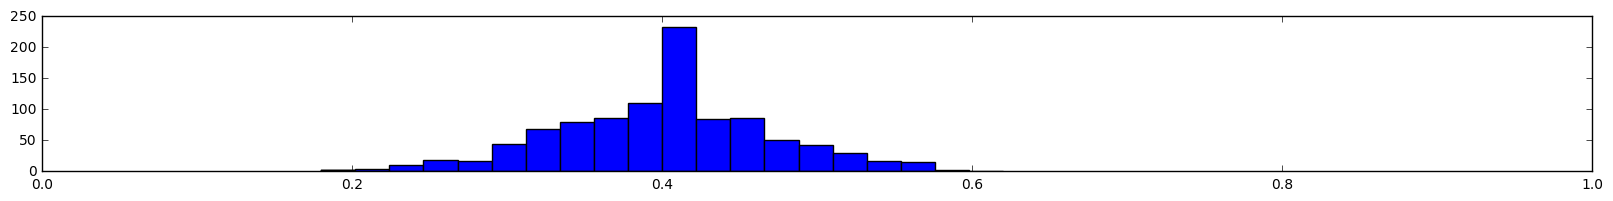

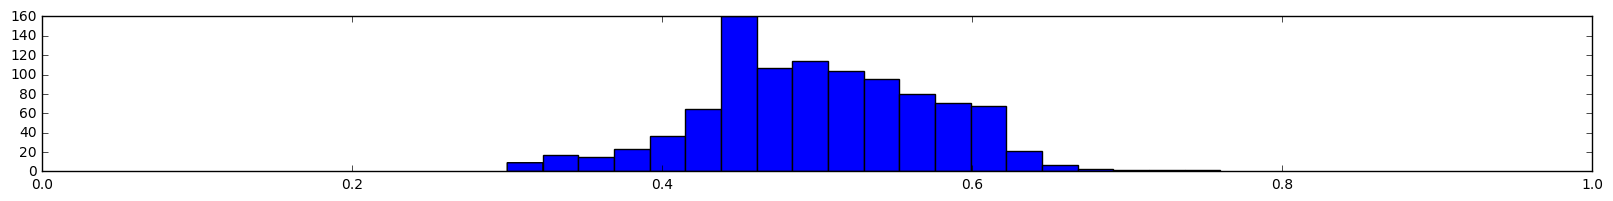

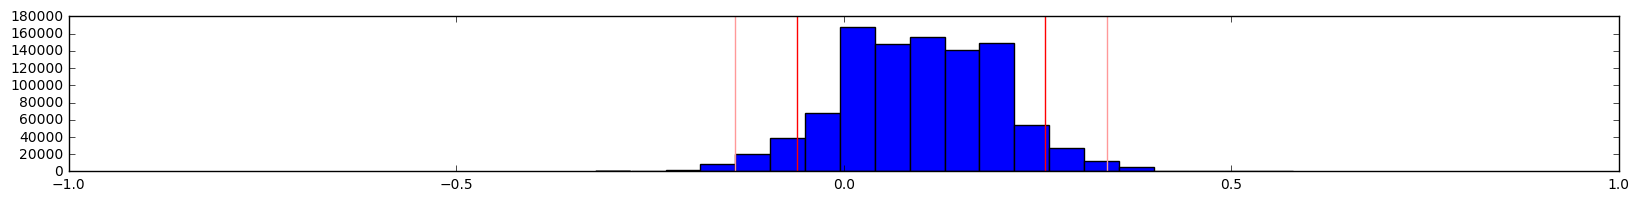

p95 significance for diff values: diff < -0.06 or diff > 0.26
p99 significance for diff values: diff < -0.14 or diff > 0.34


In [60]:
simulate_biased_and_report(1000, 50, [[0.4,0.6], [0.5,0.5]], 77)

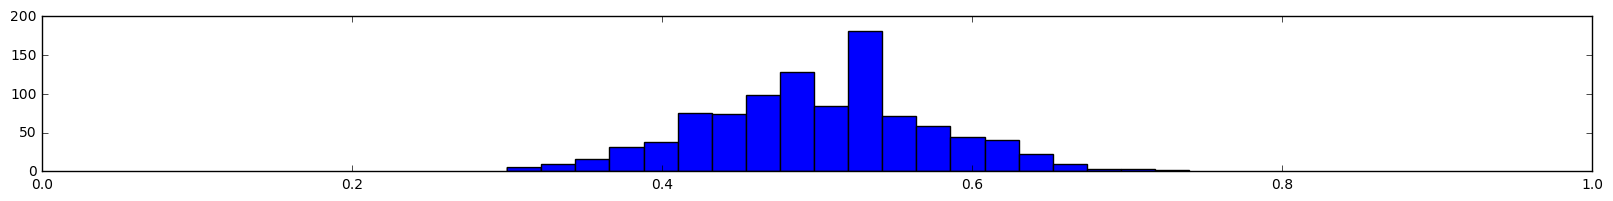

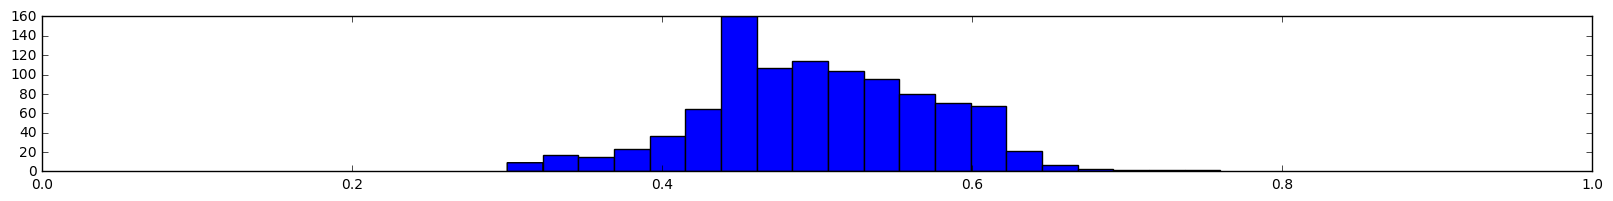

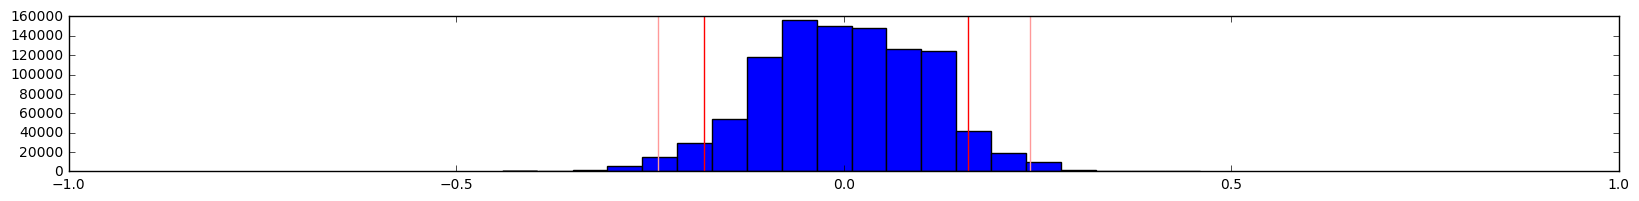

p95 significance for diff values: diff < -0.18 or diff > 0.16
p99 significance for diff values: diff < -0.24 or diff > 0.24


In [61]:
simulate_biased_and_report(1000, 50, [[0.5,0.5], [0.5,0.5]], 77)

In [63]:
# with a null hypothesis of
#   "there is no bias based on race"...
#   and each subject is equally likely to suspend or not in each scenario
#   (which is unvalidated at this point with no real a priori)
# when we run an experiment:
#   with a single scenario
#   across a sample size of 50 subjects
#   and compute the "rate of suspension" for each condition
#   and then determine the diff between rates in each condition
#   (or the ratio between rates?)
# then we would fail to reject the null hypothesis
#   at p95 for any diff values within the range [-0.18 and 0.16]
#   at p99 for any diff values within the range [-0.24 and 0.24]
# in other words
#   with n=50, we'd need to find a diff in rates greater than 16 percentage points (p95)
#   increasing to n=100, we'd need to find a diff greater than 12 percentage points (p95)
#   increasing to n=200, we'd need to find a diff greater than 8 percentage points (p95)
#   increasing to n=500, we'd need to find a diff greater than 5 percentage points (p95)

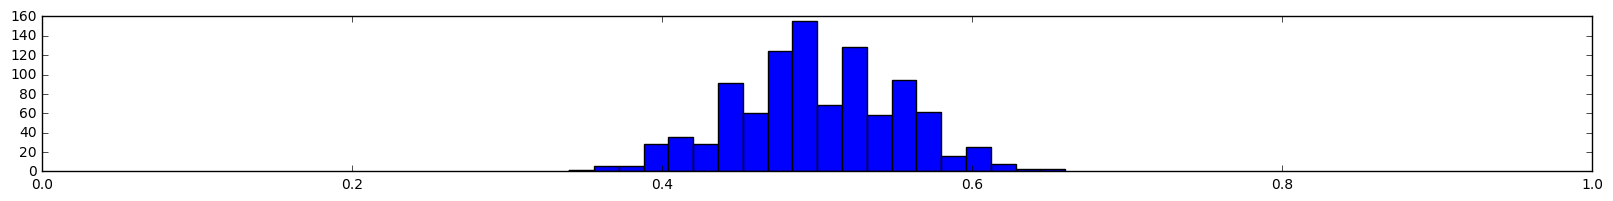

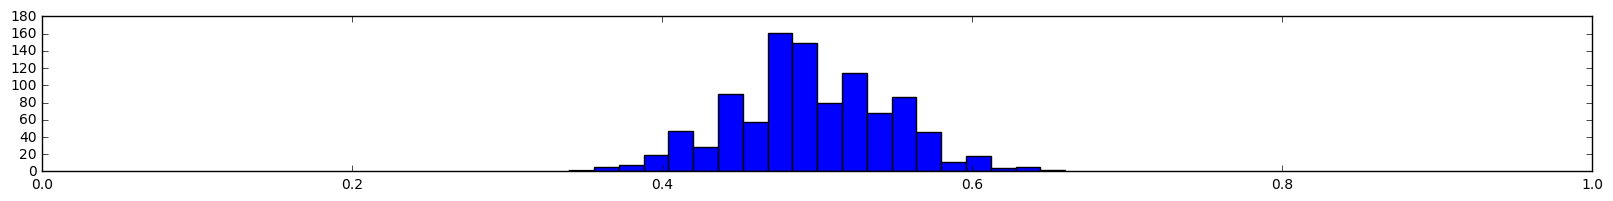

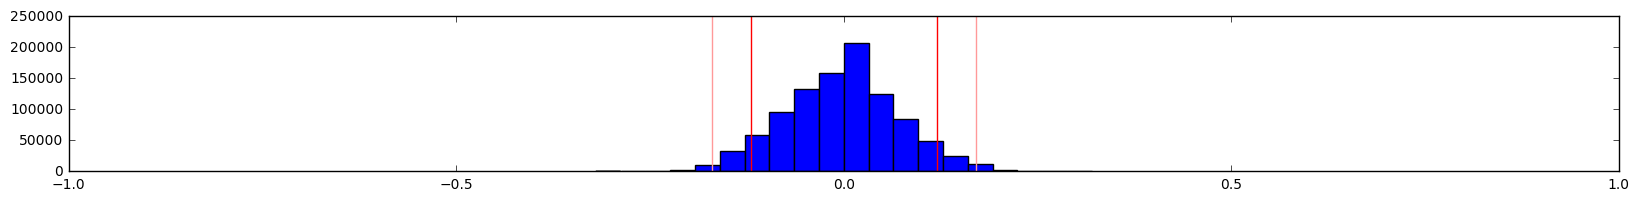

p95 significance for diff values: diff < -0.12 or diff > 0.12
p99 significance for diff values: diff < -0.17 or diff > 0.17


In [62]:
simulate_biased_and_report(1000, 100, [[0.5,0.5], [0.5,0.5]], 77)

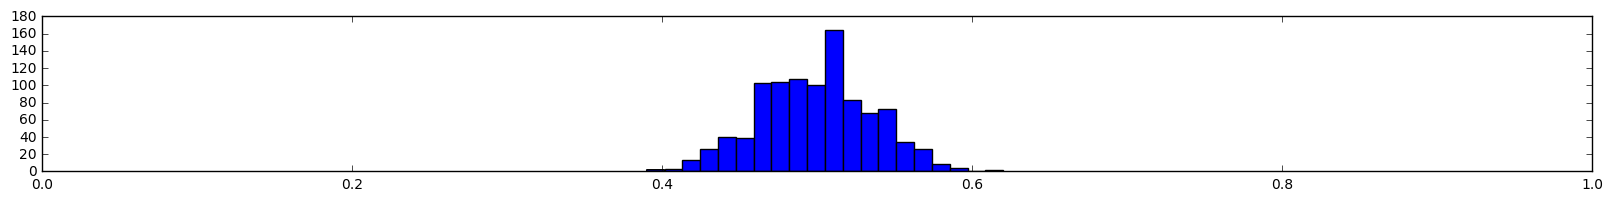

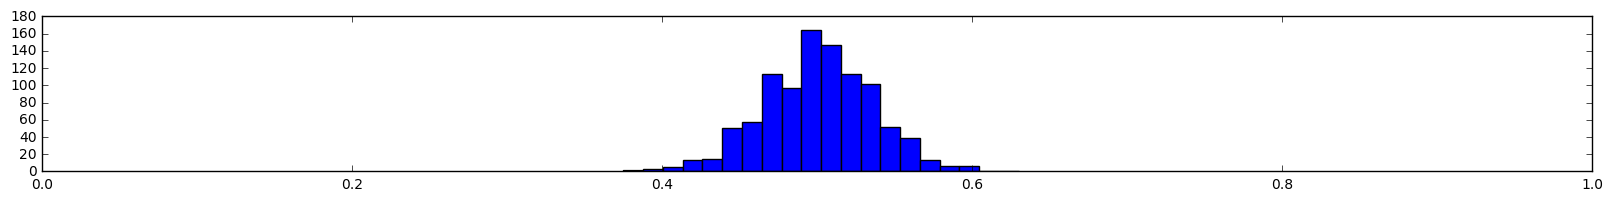

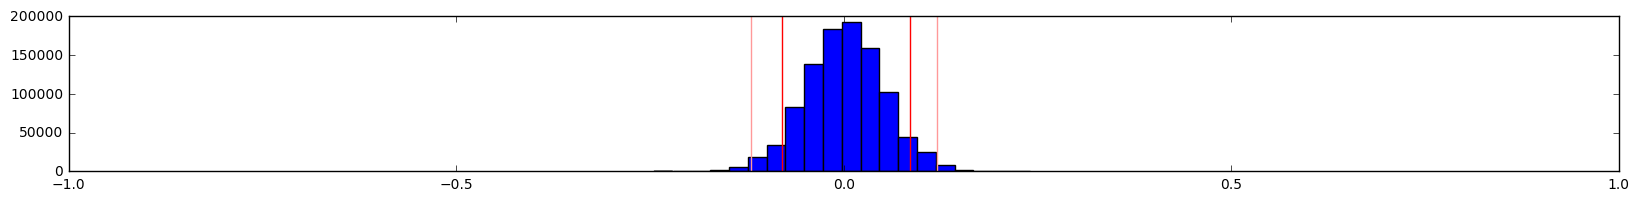

p95 significance for diff values: diff < -0.08 or diff > 0.085
p99 significance for diff values: diff < -0.12 or diff > 0.12


In [52]:
simulate_biased_and_report(1000, 200, [[0.5,0.5], [0.5,0.5]], 77)

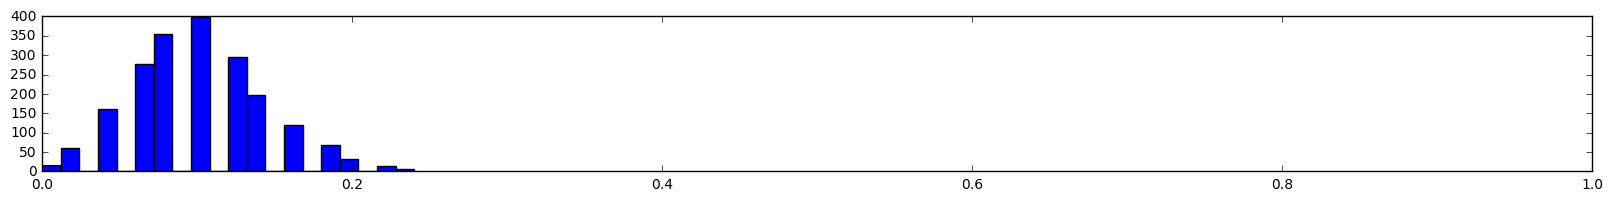

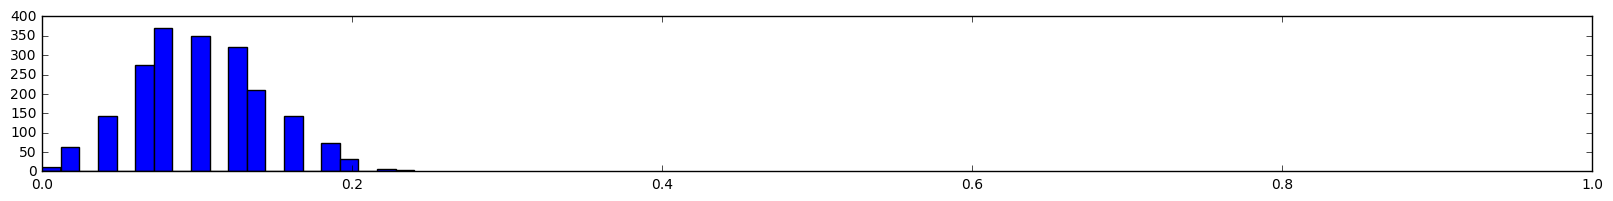

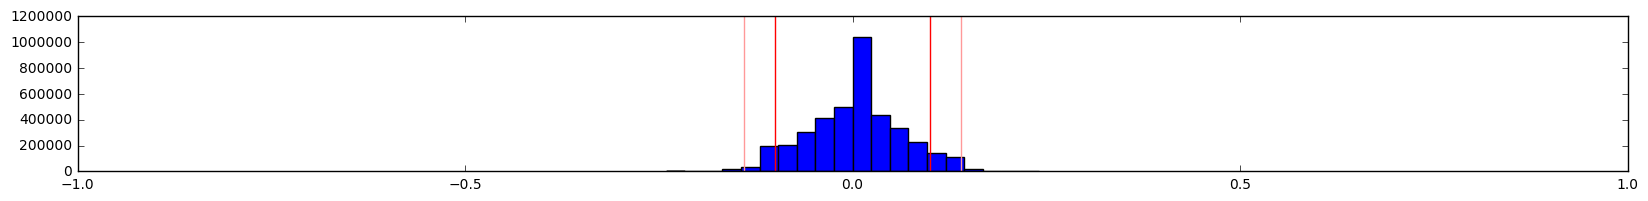

p95 significance for diff values: diff < -0.1 or diff > 0.1
p99 significance for diff values: diff < -0.14 or diff > 0.14


In [48]:
simulate_biased_and_report(2000, 50, [[0.1,0.9], [0.1,0.9]], 77)

In [104]:
def required_effect_size(simulations, max_sample_size, step_size, biases, seed):
    plt.figure(figsize=(8,4))
    for sample_size in range(step_size, max_sample_size, step_size):
        pairs = simulate_biased(simulations, sample_size, biases, seed)
        diffs = compute_diffs(pairs, sample_size)
        p95 = np.percentile(diffs, [5, 95])
        plt.scatter(sample_size, p95[1])
        plt.ylim(0, 0.3)
    return plt

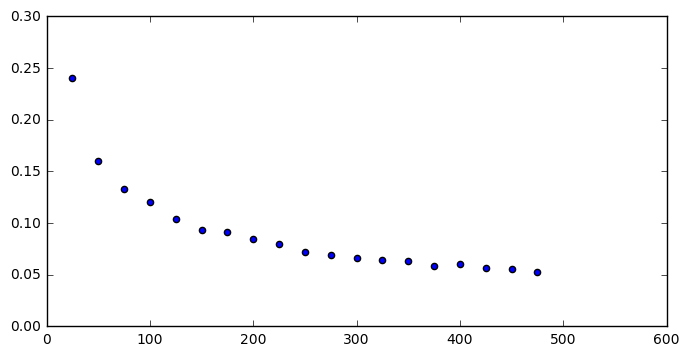

In [108]:
required_effect_size(1000, 500, 25, [[0.5, 0.5], [0.5, 0.5]], 77).show()

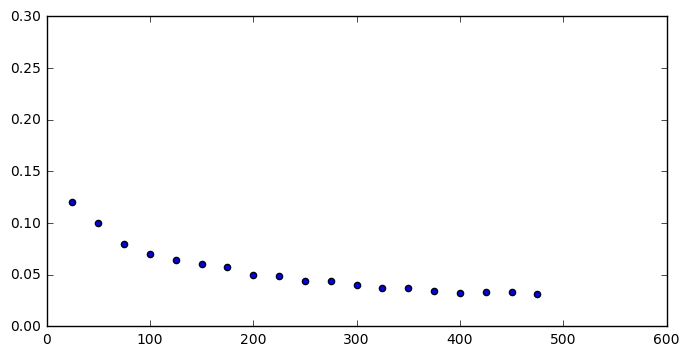

In [109]:
required_effect_size(1000, 500, 25, [[0.1, 0.9], [0.1, 0.9]], 77).show()

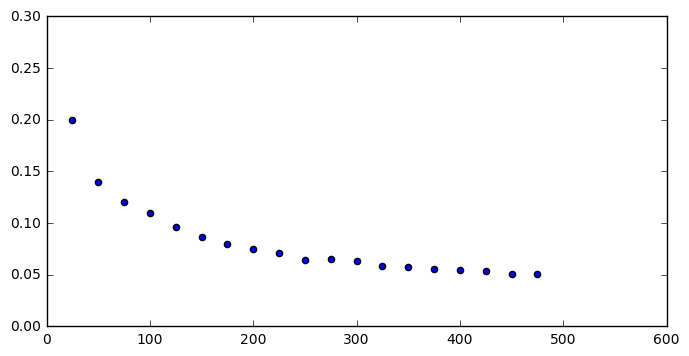

In [110]:
required_effect_size(1000, 500, 25, [[0.7, 0.3], [0.7, 0.3]], 77).show()

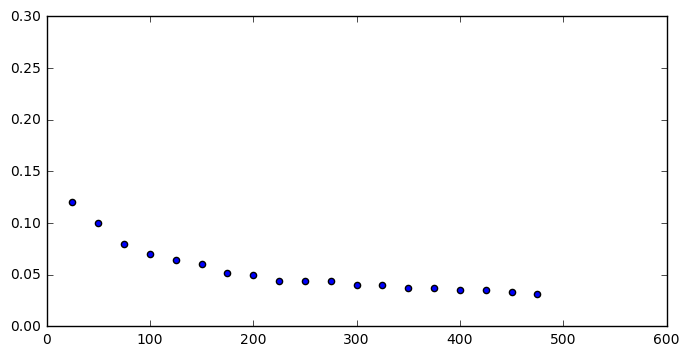

In [112]:
required_effect_size(1000, 500, 25, [[0.9, 0.1], [0.9, 0.1]], 77).show()

In [113]:
# there also appears to be an interaction between whatever the a priori decision process is,
# particularly at low sample sizes
# i don't really understand what this is about, but assume it's either related to the artifacts
# around zero rates, or related to 50/50 being "no information" and so particularly difficult to
# extract something meaningful for 50/50 versus 40/60 as compared to 10/90 to 20/80
# but this is just intuition and guessing

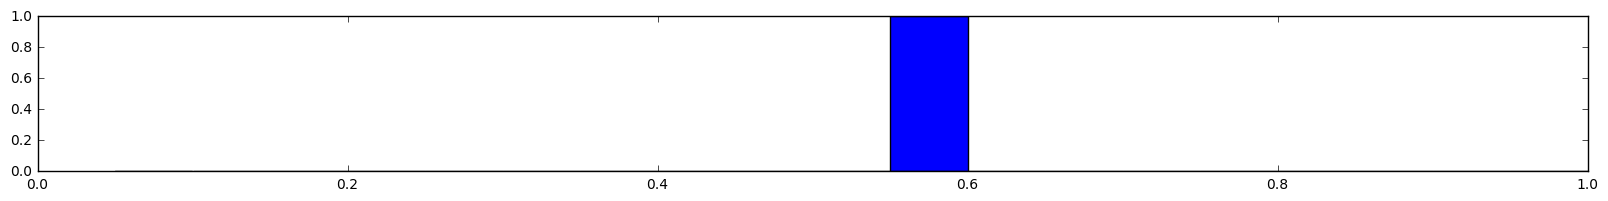

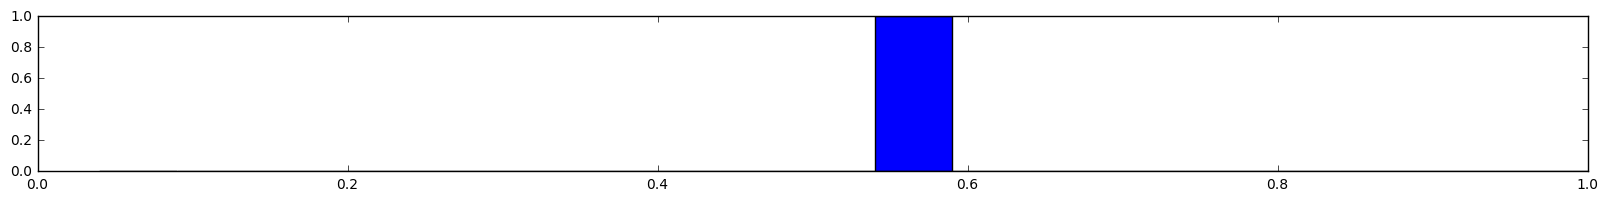

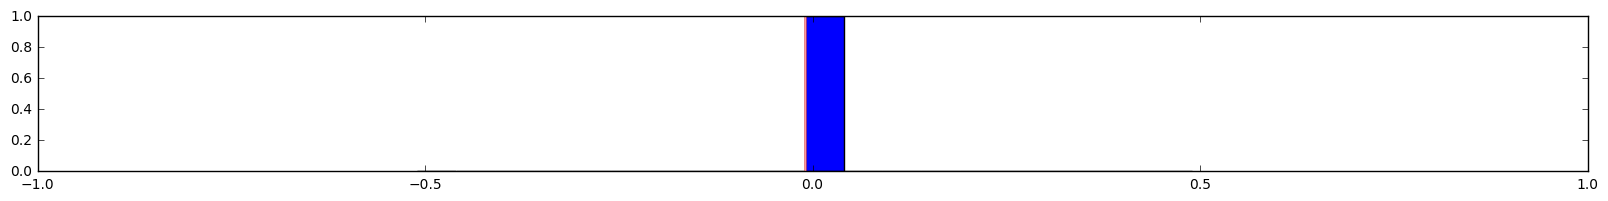

p95 significance for diff values: diff < -0.01 or diff > -0.01
p99 significance for diff values: diff < -0.01 or diff > -0.01


In [116]:
ps = simulate_biased_and_report(1, 100, [[0.5,0.5], [0.5,0.5]], 77)

In [117]:
ps

[[array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
         1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
         1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
         0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
         0, 1, 1, 0, 0, 0, 0, 0])],
 [array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
         1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
         0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
         0, 1, 0, 0, 0, 0, 1, 0])]]

In [127]:
# variance as well
# effect size = mean difference you can detect / sqrt(std)

# two cells
#
#   black      white
#   ------     ------
#   | 40 |     | 60 |
#   ------     ------
#
# within-group variation
# between-group difference
print(list(np.mean(p) for p in ps))

[0.55000000000000004, 0.54000000000000004]


In [198]:
# 40/60 scenario with boolean responses
def forty_sixty_boolean():
    np.random.seed(88)
    black_cell = np.array(list(1 for i in range(0, 40)) + list(0 for i in range(0, 60)))
    white_cell = np.array(list(1 for i in range(0, 60)) + list(0 for i in range(0, 40)))
    np.random.shuffle(black_cell)
    np.random.shuffle(white_cell)
    return (black_cell, white_cell)

black_cell, white_cell = forty_sixty_boolean()
values = np.append(black_cell, white_cell)
print('black_cell: ', sum(black_cell), black_cell)
print('white_cell: ', sum(white_cell), white_cell)

black_cell:  40 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0]
white_cell:  60 [0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0]


In [197]:
def stats(black_cell, white_cell, sample_size):
    mse = np.mean((black_cell - white_cell) ** 2)
    g = (np.mean(black_cell) - np.mean(white_cell)) / math.sqrt(mse)
    d = g * math.sqrt((n / (n - 2)))

    print('black:')
    print('    var:', np.var(black_cell))
    print('    std:', np.var(black_cell))
    print('white:')
    print('    var:', np.var(white_cell))
    print('    std:', np.var(white_cell))
    print()
    print('overall:')
    print('  ratio:', sum(white_cell) / sum(black_cell))
    print('    var: ', np.var(black_cell + white_cell))
    print('    std: ', np.std(black_cell + white_cell))
    print('    mse: ', mse)
    print('      g: ', g)
    print('      d: ', d)
    
stats(black_cell, white_cell, 200)

black:
    var: 0.24
    std: 0.24
white:
    var: 0.24
    std: 0.24

overall:
  ratio: 1.5
    var:  0.48
    std:  0.692820323028
    mse:  0.52
      g:  -0.277350098113
      d:  -0.278747336669


In [194]:
# from http://onlinestatbook.com/2/effect_size/two_means.html
"When the units of a measurement scale are meaningful in their own right, then the difference between means is a good and easily interpretable measure of effect size. "

'When the units of a measurement scale are meaningful in their own right, then the difference between means is a good and easily interpretable measure of effect size. '

In [195]:
"When the dependent variable is measured on a ratio scale, it is often informative to consider the proportional difference between means in addition to the absolute difference"

'When the dependent variable is measured on a ratio scale, it is often informative to consider the proportional difference between means in addition to the absolute difference'

In [201]:
# 40/60 scenario with boolean responses
def forty_sixty_likert():
    np.random.seed(88)
    black_cell = np.array(list(5 for i in range(0, 40)) + list(1 for i in range(0, 60)))
    white_cell = np.array(list(3 for i in range(0, 60)) + list(1 for i in range(0, 40)))
    np.random.shuffle(black_cell)
    np.random.shuffle(white_cell)
    return (black_cell, white_cell)

forty_sixty_likert()

(array([1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1,
        5, 5, 1, 5, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 5,
        5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1,
        1, 1, 1, 5, 5, 5, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5,
        1, 1, 1, 5, 1, 1, 5, 1]),
 array([1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3,
        3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3,
        3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1,
        3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1,
        3, 3, 1, 1, 3, 3, 1, 1]))

In [203]:
def likert():
    black_cell, white_cell = forty_sixty_likert()
    stats(black_cell, white_cell, 200)
likert()

black:
    var: 3.84
    std: 3.84
white:
    var: 0.96
    std: 0.96

overall:
  ratio: 0.846153846154
    var:  4.8
    std:  2.19089023002
    mse:  4.96
      g:  0.179605302027
      d:  0.180510120358
